# MNIST Data

In this exercise, some data preprocessing steps are prepared (look it through so you understand it). Thereafter you will create two models. As always, the documentation is the place to go if you need to deepen your understanding or find out how to do something. 

In [1]:
# !pip install ipympl
# !pip list
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# %matplotlib widget
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating a function that will be used later

In [2]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

# Downloading the data and inspecting it

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [4]:
# print(mnist.DESCR)

In [5]:
# Taking less data to speed up training. 
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]

X_test = X[6000:7000]
y_test = y[6000:7000]

# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
# scaler = Normalizer()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

In [6]:
# The first label ("true answer") is 5. 
# y[0]
# (X_train/255).std()

(-0.5, 27.5, 27.5, -0.5)

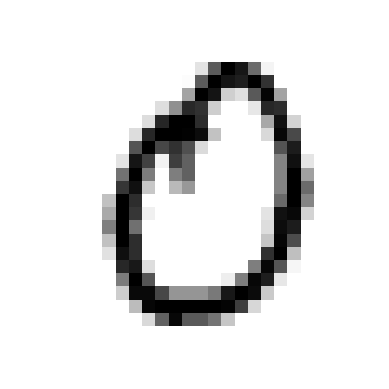

In [7]:
# Plotting the features of the X data, it looks like a 5.
# some_digit = X_train_scaled[118].reshape(1,-1)
some_digit = (X_train[118])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")


In [8]:
print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


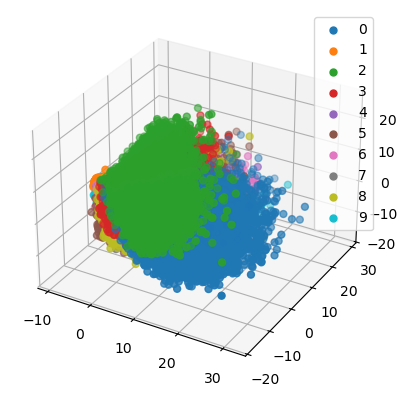

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_scaled = scaler.fit_transform(X)
x_pca = pca.fit_transform(X_scaled)
x_df = pd.DataFrame(x_pca)

result = pd.DataFrame(x_pca, columns=['PCA%i' % i for i in range(3)], index=x_df.index)

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(result.loc[y == i, 'PCA0'], result.loc[y == i, 'PCA1'], result.loc[y == i, 'PCA2'], label=i, s=25)

plt.legend()
plt.show()

# plt.figure(figsize=(10,10))
# for i in range(10):
#     plt.scatter(x_pca[y==i, 0], x_pca[y==i, 1], label=i, s=5, alpha=0.8)
# plt.legend()
# plt.title("PCA of the MNIST dataset")

In [10]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=42)

# x_tsne = tsne.fit_transform(X[:5000])
# plt.figure(figsize=(10,10))
# for i in range(10):
#     plt.scatter(x_tsne[y[:5000]==i, 0], x_tsne[y[:5000]==i, 1], label=i)#, s=5, alpha=0.8)
# plt.legend()
# plt.title("t-SNE")

In [11]:
# _=plt.hist(y_train.ravel())

# Creating a simple modell and evaluating it on the validation set

1. Create a linear support vector classifier model (random_state=42 is just used so we get same results due to the training algorithm beeing stochastic.):
```python
lin_clf = LinearSVC(random_state=42)
```

2. Fit the model on the scaled training data. **You might get an warning, ignore it.**
3. Predict the scaled validation data. 
4. Compute accuracy score, use the imported functionality: 
```python
from sklearn.metrics import accuracy_score
```
5. Visualize the confusion matrix, use the function we created: 
```python
def display_confusion_matrix
```

In [12]:
clf = LinearSVC(C=1, penalty='l1', max_iter=5000, random_state=42)
# clf = SVC(kernel='rbf', C=1, gamma=0.01, random_state=42)

clf.fit(X_train_scaled, y_train)

# coef = clf.coef_
# plt.subplots(2, 5, figsize=(15, 8))
# for i in range(10):
#     l1 = plt.subplot(2, 5, i + 1)
#     l1.imshow(coef[i].reshape(28, 28), cmap=plt.cm.RdBu)
#     l1.set_xticks(())
#     l1.set_yticks(())
#     l1.set_xlabel("Class %i" % i)
# plt.suptitle("Class Coefficients")
# plt.show()

c:\Users\claes\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, max_iter=5000, penalty='l1', random_state=42)

In [13]:
a = clf.predict(X_val_scaled)

In [14]:
accuracy_score(y_val, a)

0.867

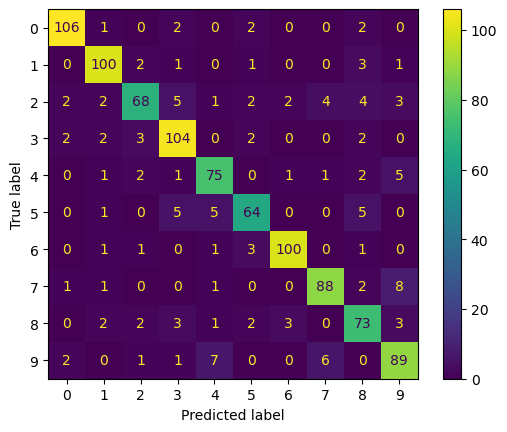

In [15]:
display_confusion_matrix(y_val, a)

# Modell Selection with Gridsearch
## Doing GridSearch (Takes a while to run) - remove the comments if you want to run the code

1. Create an instance of a general (not linear) SVC model. 
```python
svm_clf = SVC()
```
2. Specify a hyperparameter grid:
```python
hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]
```
3. Use GridSearchCV and fit the model with the hyperparameter grid above **(note, fitting the model with grid_search takes a while)**.
4. If you for instance called your fine-tuned model in the step above for "gs_svm", then you can run this code:
```python
pd.DataFrame(gs_svm.cv_results_)
```
to analyze the grid search results. 

5. Predict the scaled validation data, compute the accuracy score, visualize the confusion matrix. 


6. Which model is better, the linear created above or this one where we used GridSearch?

In [16]:
svm_clf = SVC()
hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]
gs_svm = GridSearchCV(svm_clf, hyper_param_grid, cv=5, scoring='accuracy',n_jobs=-1)
gs_svm.fit(X_train_scaled, y_train)
pd.DataFrame(gs_svm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,101.300479,2.379522,14.833060,0.309020,0.5,1,rbf,"{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
1,45.356788,0.858455,6.850119,0.282924,0.5,1,poly,"{'C': 0.5, 'gamma': 1, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1
2,95.888872,2.264286,16.132053,1.863227,0.5,2,rbf,"{'C': 0.5, 'gamma': 2, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
3,39.561327,2.838456,5.989492,0.482403,0.5,2,poly,"{'C': 0.5, 'gamma': 2, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1
4,94.949805,1.733802,16.447305,0.501776,1.0,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
5,41.247593,1.721980,6.148472,0.465716,1.0,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1
6,93.309493,2.425480,18.134230,0.805002,1.0,2,rbf,"{'C': 1, 'gamma': 2, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
7,39.641740,1.817179,5.804991,0.712199,1.0,2,poly,"{'C': 1, 'gamma': 2, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1
8,94.685305,2.774935,18.732782,0.615696,1.5,1,rbf,"{'C': 1.5, 'gamma': 1, 'kernel': 'rbf'}",0.113,0.112,0.112,0.113,0.113,0.1126,0.000490,7
9,41.012573,1.926082,6.512772,0.175442,1.5,1,poly,"{'C': 1.5, 'gamma': 1, 'kernel': 'poly'}",0.926,0.930,0.946,0.950,0.933,0.9370,0.009338,1


In [17]:
gs_svm.best_params_


{'C': 0.5, 'gamma': 1, 'kernel': 'poly'}

# Model Evaluation on Test Data
Use the best model for evaluation on test data. 

In [18]:
gs_svm.best_estimator_.fit(X_train_scaled, y_train)


SVC(C=0.5, gamma=1, kernel='poly')

In [19]:
gs_svm.best_estimator_.score(X_test_scaled, y_test)

0.939

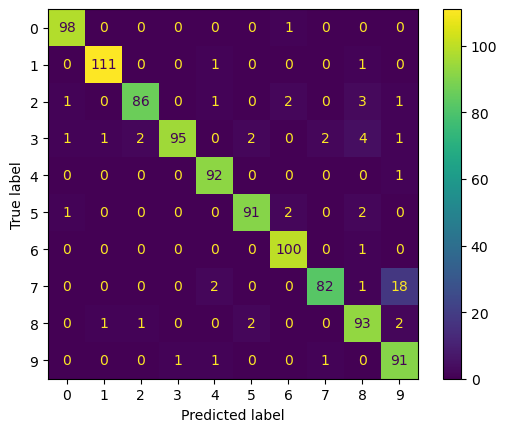

In [20]:
display_confusion_matrix(y_test, gs_svm.best_estimator_.predict(X_test_scaled))

In [68]:
# mnist = pd.DataFrame(np.c_[X, y], columns=[f'pixel{i}' for i in range(X.shape[1])] + ['label'])
# mnist.info()


In [21]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=36)

# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 


In [22]:
svm_clf = SVC(C=0.5, gamma=1, kernel='poly')
svm_clf.fit(X_train_scaled, y_train)


SVC(C=0.5, gamma=1, kernel='poly')

In [23]:

svm_clf.score(X_test_scaled, y_test)


0.949

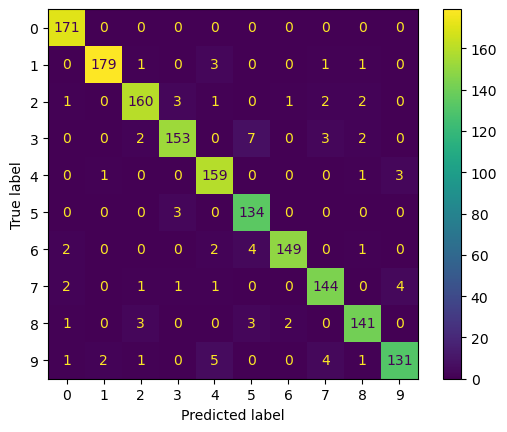

In [24]:

display_confusion_matrix(y_val, svm_clf.predict(X_val_scaled))